# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [71]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## Data Overview

- Observations
- Sanity checks

In [72]:
# Loading the dataset and making a copy of that so we still have access to the original dataset.
learn=pd.read_csv("ExtraaLearn.csv")
data=learn.copy()


In [73]:
# printing the first ten rows of the data
data.head(10)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
5,EXT006,50,Unemployed,Mobile App,High,4,212,5.682,Phone Activity,No,No,No,Yes,No,0
6,EXT007,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
7,EXT008,57,Professional,Mobile App,Medium,2,517,2.985,Email Activity,No,No,No,No,No,0
8,EXT009,57,Professional,Mobile App,High,2,2231,2.194,Phone Activity,No,No,Yes,No,No,1
9,EXT010,59,Professional,Mobile App,High,1,1819,3.513,Phone Activity,No,No,No,No,No,0


In [74]:
# exploring the shape of data
data.shape

(4612, 15)

In [75]:
# printing general information about gthe dtata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [76]:
# Checking summary statistic of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [77]:
# Check for missing values
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [78]:
# Here we create two lists, one for the numerical columns of the dataframe and the other for categorial ones
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
print(numerical_columns)
print(categorical_columns)

['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']
['ID', 'current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']


In [79]:
# defining a function to plot stacked bar plots
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel(target)


Now, through the use of stacked bar plots, we investigate the relationship between various features and the conversion status of the lead.







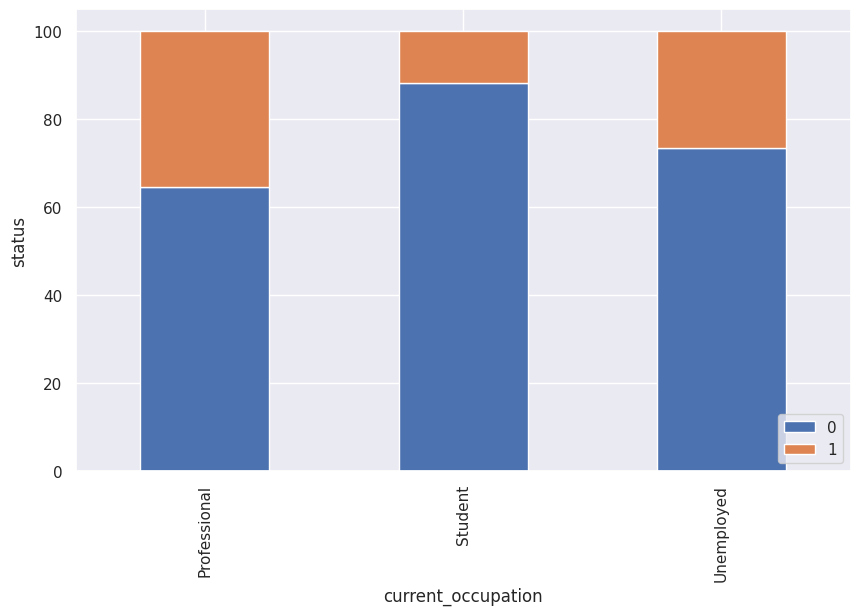

In [80]:
# checking how different currentoccupation effects the lead status
stacked_barplot(data,'current_occupation','status')

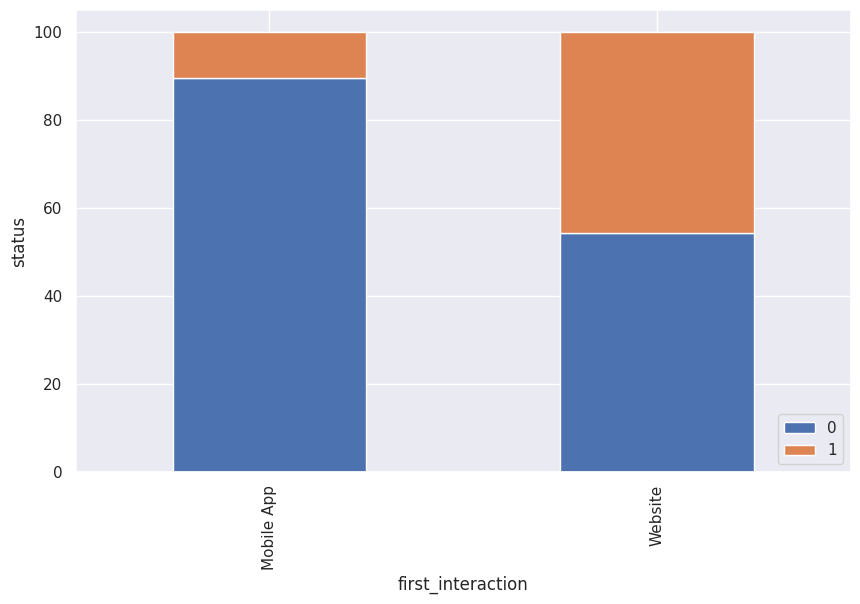

In [81]:
#checking how company's first impression effects the lead status
stacked_barplot(data,'first_interaction','status')

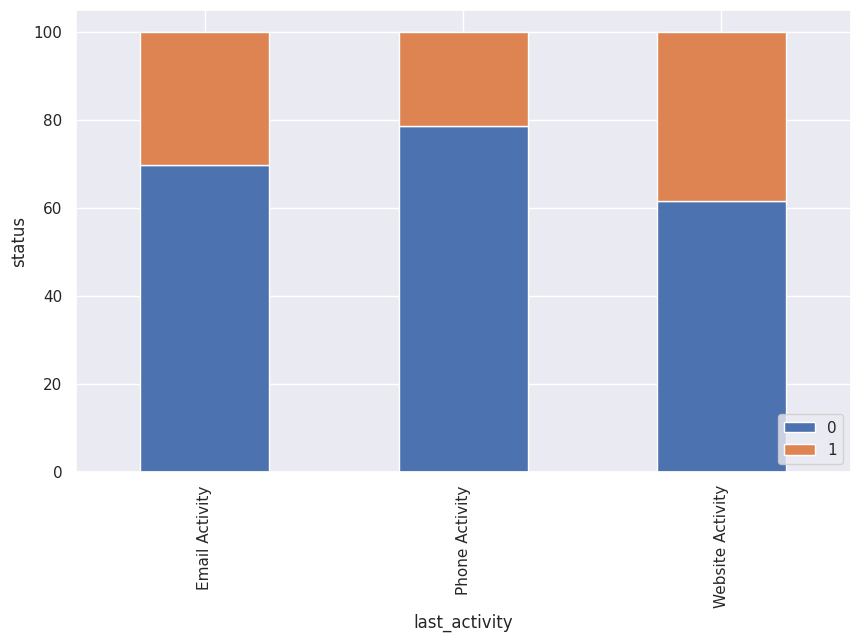

In [82]:
stacked_barplot(data,'last_activity','status')

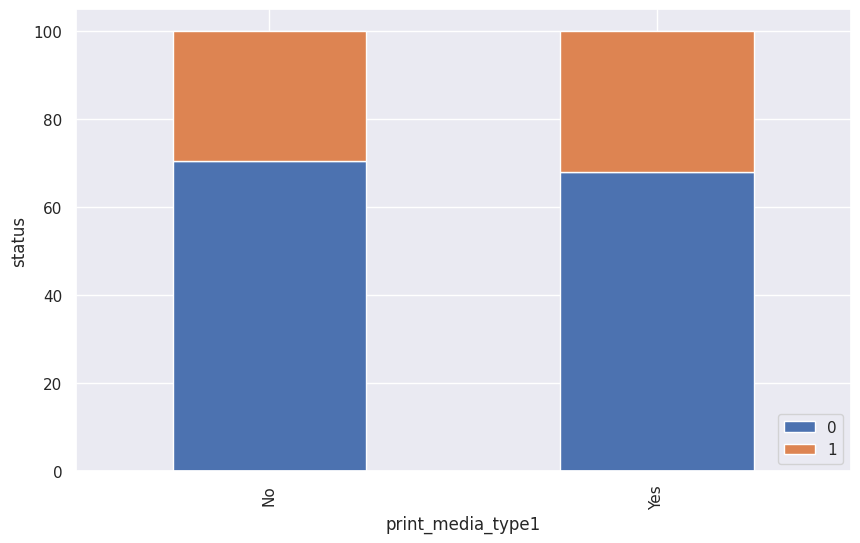

In [83]:
stacked_barplot(data,'print_media_type1','status')

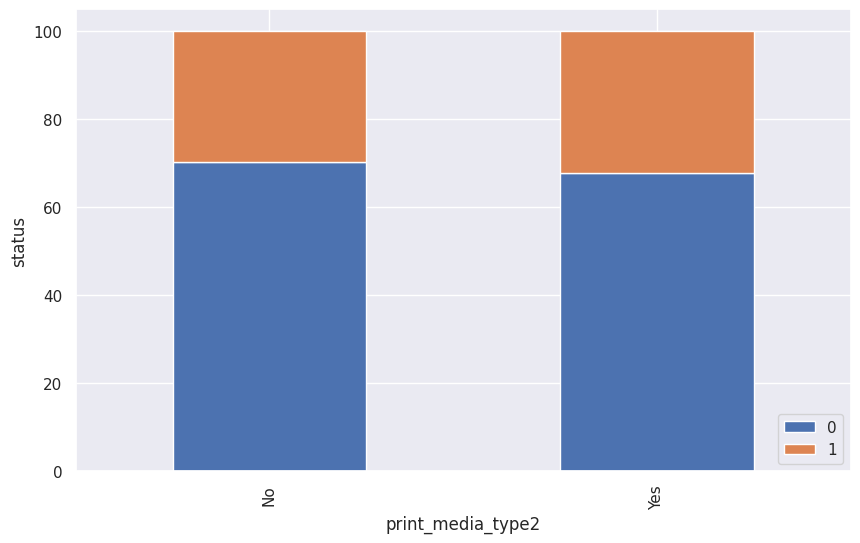

In [84]:
stacked_barplot(data,'print_media_type2','status')

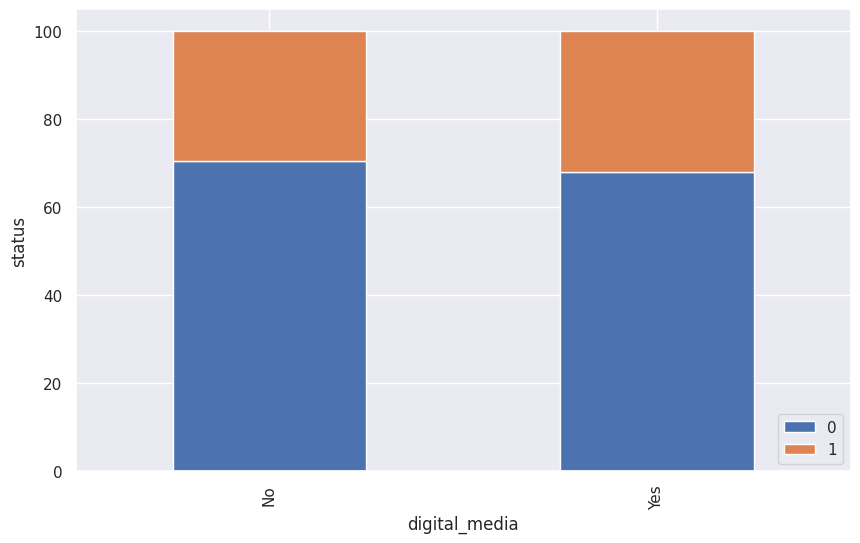

In [85]:
stacked_barplot(data,'digital_media','status')

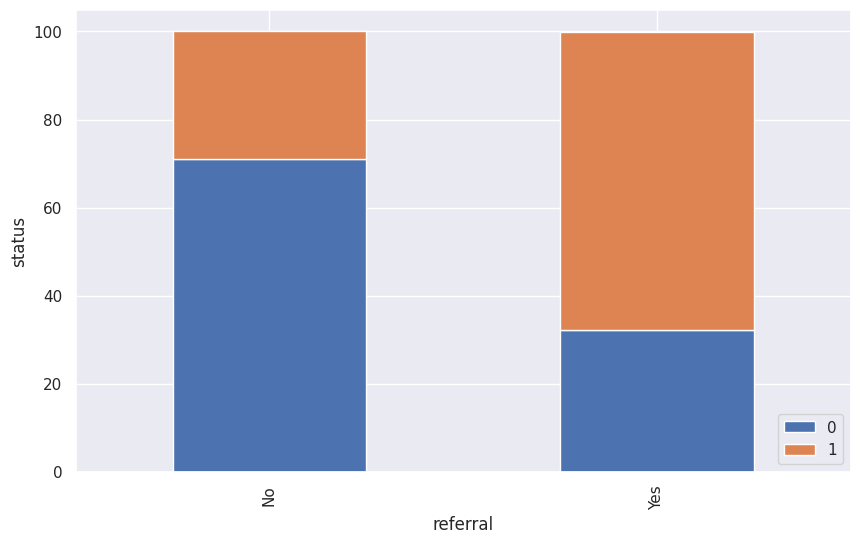

In [86]:
stacked_barplot(data,'referral','status')

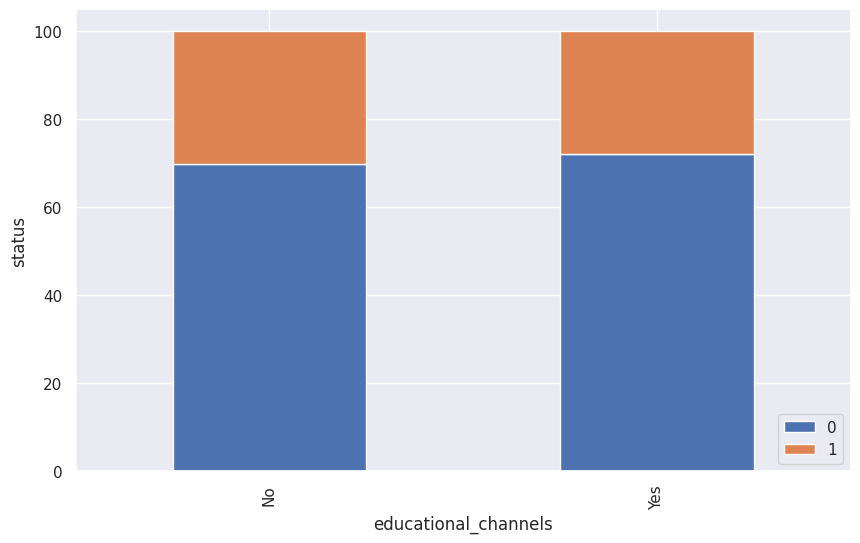

In [87]:
stacked_barplot(data,'educational_channels','status')

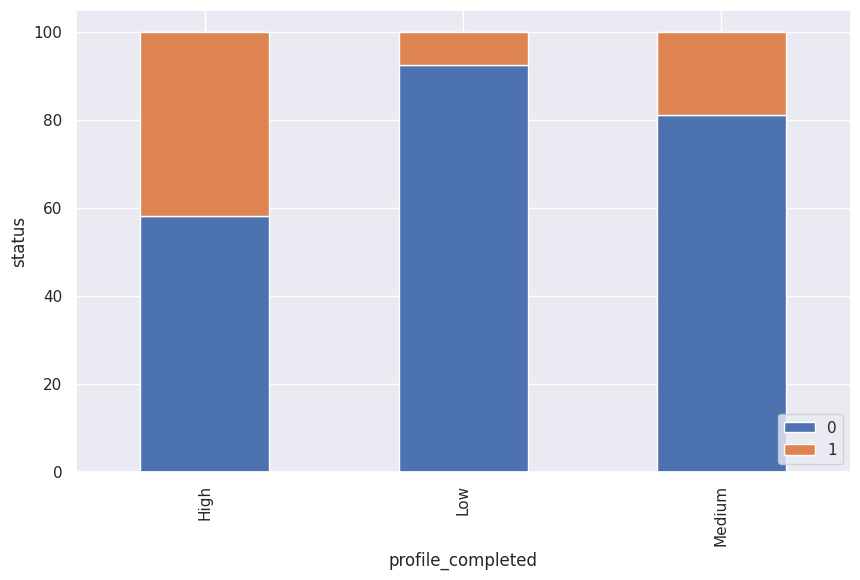

In [88]:
stacked_barplot(data,'profile_completed','status')

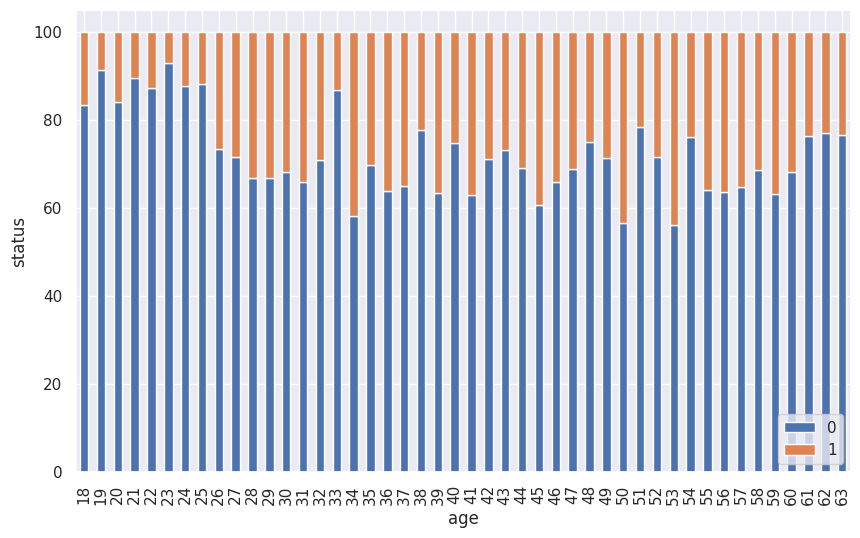

In [89]:
stacked_barplot(data,'age','status')

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## **Oservations and Answers**

1- Upon examination of the stacked barplot, it is evident that both professional and unemployed leads exhibit a higher probability of conversion to paid customers compared to students.

2- The barplot illustrates that leads engaging via website as their initial interaction are more inclined to transition into paid customers compared to those interacting through the mobile app.

3- Analysis of the barplot suggests that website activity serves as the most effective means of lead interaction, with email activity ranking as the second-best option.

4- Evaluation of the barplots depicting various lead acquisition channels reveals that referrals yield the highest conversion rates. This underscores the significance of interpersonal recommendations from friends, family, and colleagues over other channels such as newspapers and magazines.

5- Affirmatively, the barplot portraying profile completion rates highlights a notable correlation between the extent of profile details filled out and the likelihood of conversion. Specifically, a higher level of profile completion correlates with significantly increased conversion probabilities compared to instances of low or medium profile completion.

Now lets look at distribution of categorial columns as well as "status" column.

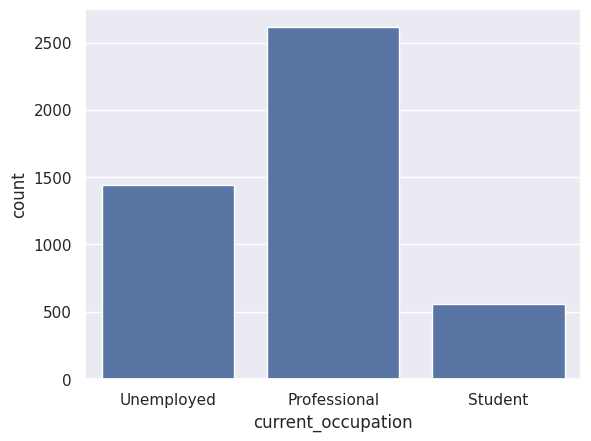

In [90]:
sns.countplot(x = data['current_occupation'])
plt.show()

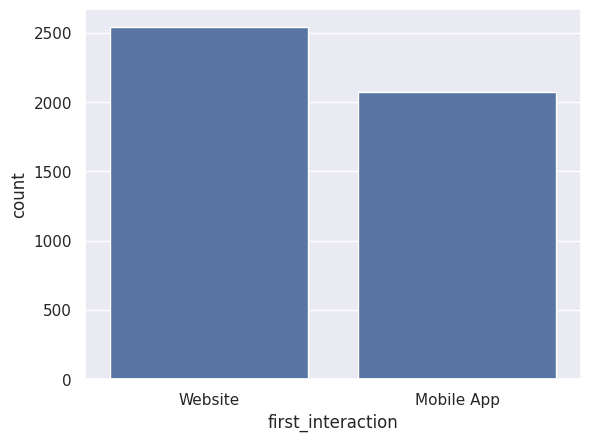

In [91]:
sns.countplot(x = data['first_interaction'])
plt.show()

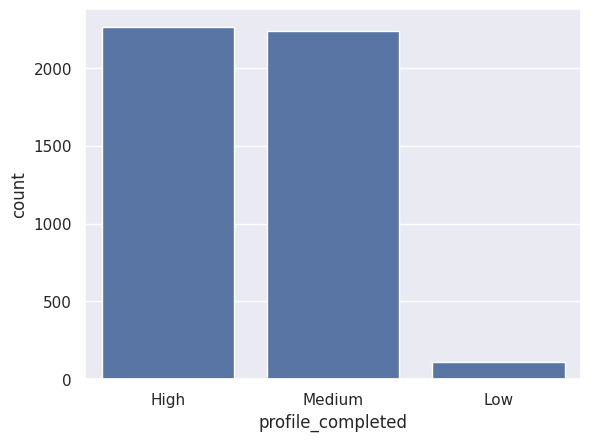

In [92]:
sns.countplot(x = data['profile_completed'])
plt.show()

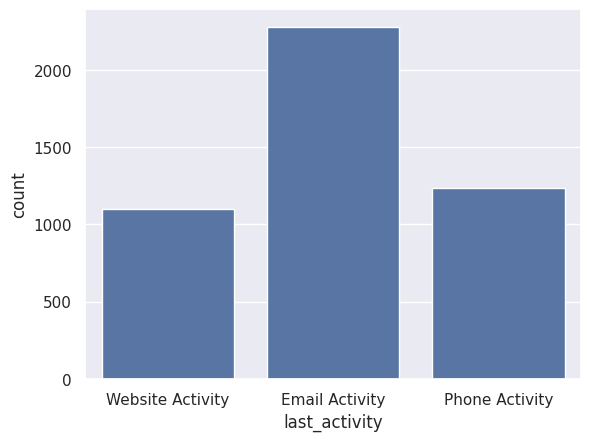

In [93]:
sns.countplot(x = data['last_activity'])
plt.show()

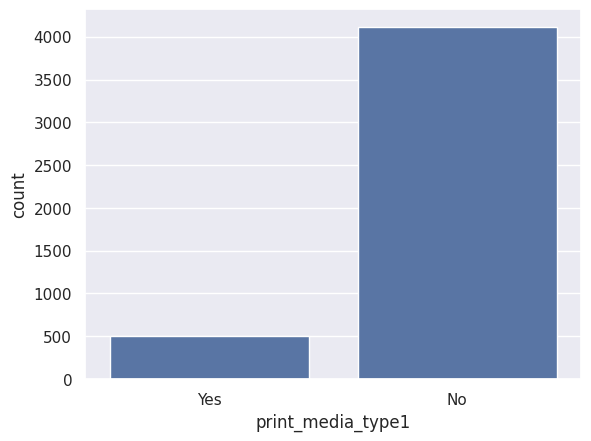

In [94]:
sns.countplot(x = data['print_media_type1'])
plt.show()

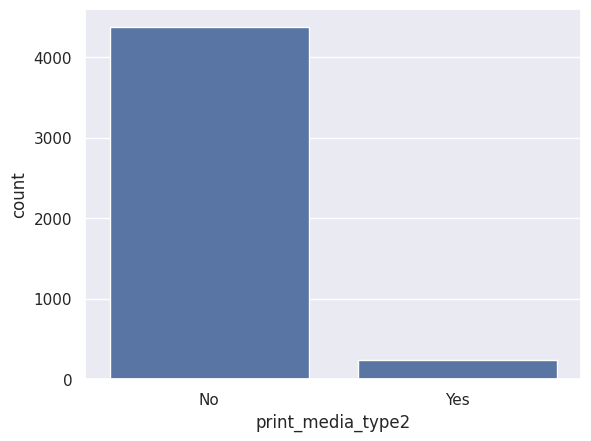

In [95]:
sns.countplot(x = data['print_media_type2'])
plt.show()

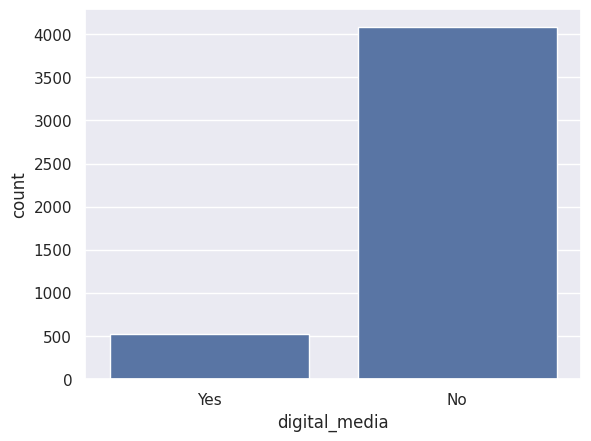

In [96]:
sns.countplot(x = data['digital_media'])
plt.show()

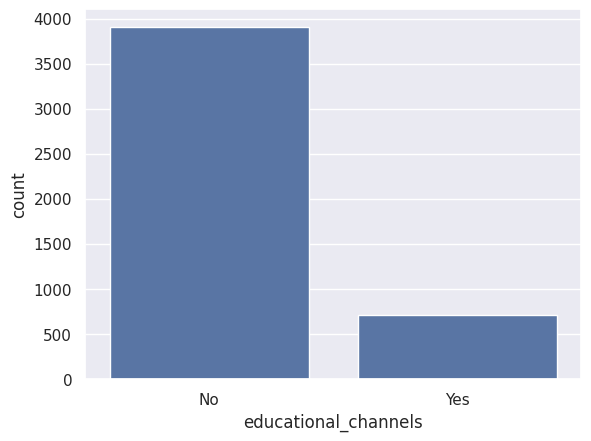

In [97]:
sns.countplot(x = data['educational_channels'])
plt.show()

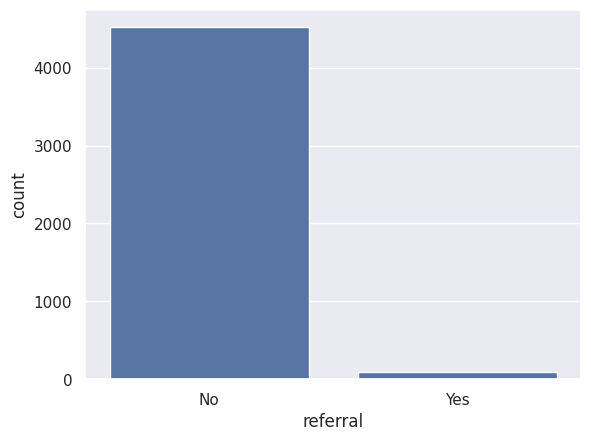

In [98]:
sns.countplot(x = data['referral'])
plt.show()

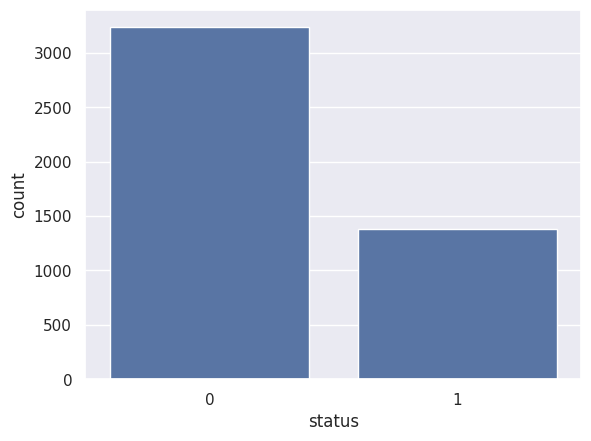

In [99]:
sns.countplot(x = data['status'])
plt.show()

**Some Observations:**

1- The dataset indicates that leads with professional occupations constitute the largest demographic compared to those who are unemployed or students.

2-Initial interactions via the website outnumber those via the mobile app.

3- The majority of profiles on the website or mobile app exhibit completion levels categorized as "high" or "medium," with only a minority completed to a "low" level.

4- Communication via email between leads and the organization is more prevalent than interactions via phone or the website.

5- Both newspaper and digital media advertising have approximately equal representation in the dataset (approximately 500 occurrences each). Combining this observation with the results from the stacked bar plot suggests that these methods exhibit similar effectiveness. Advertising in magazines appears slightly less effective compared to these two channels.

6- Relatively few referrals are present in the dataset. Given the
effectiveness of referrals discussed previously, the company could consider implementing incentives to encourage referrals

7-
The plot depicting the distribution of the target variable reveals an imbalance, with roughly twice as many occurrences of "0" compared to "1".

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [100]:
# checking for missing values:
data.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [101]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
ID,0.0
age,0.0
current_occupation,0.0
first_interaction,0.0
profile_completed,0.0
website_visits,0.0
time_spent_on_website,0.0
page_views_per_visit,0.0
last_activity,0.0
print_media_type1,0.0


Initial investigation indicates there are no missing values in the data frame.

In [102]:
# checking for duplicated values:
duplicate_rows = data.duplicated().sum()
print(duplicate_rows)

0


Thre is no duplicated rows in the dataframe.

In [103]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64


The ID assigned to each lead is unique, thereby providing no value to our model. We will proceed to remove it, although this action will be deferred until later.

In [104]:
# Looking at value counts of different categorial columns
for column in categorical_columns:
    print(data[column].value_counts())
    print('-'*50)

EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64
--------------------------------------------------
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------

It appears that there are no typos or alternative spellings present in the various categorical columns.

In [105]:
# Dropping ID column
data.drop(columns='ID',inplace=True)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [106]:
# Defining the hist_box() function
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

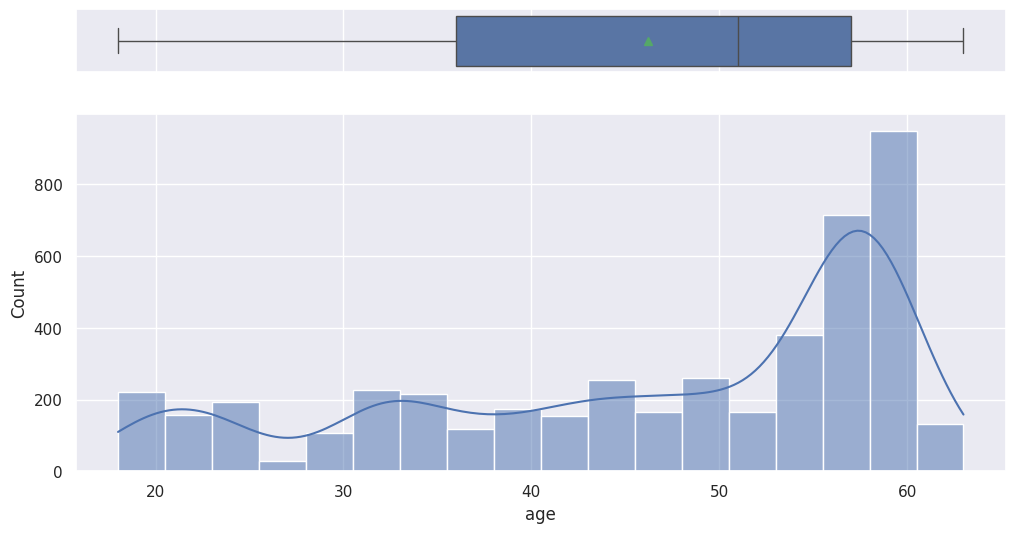

In [107]:
hist_box(data,'age')

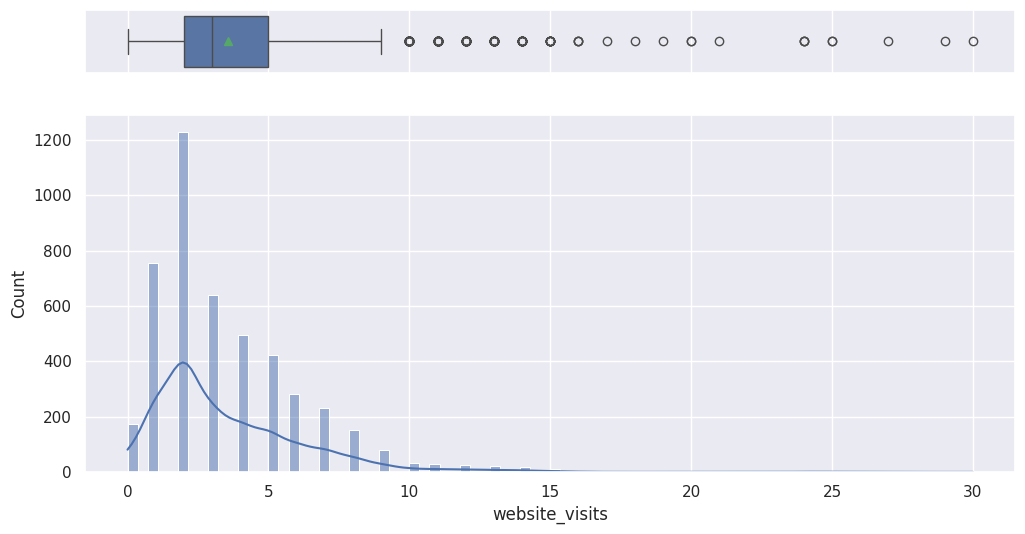

In [108]:
hist_box(data,'website_visits')

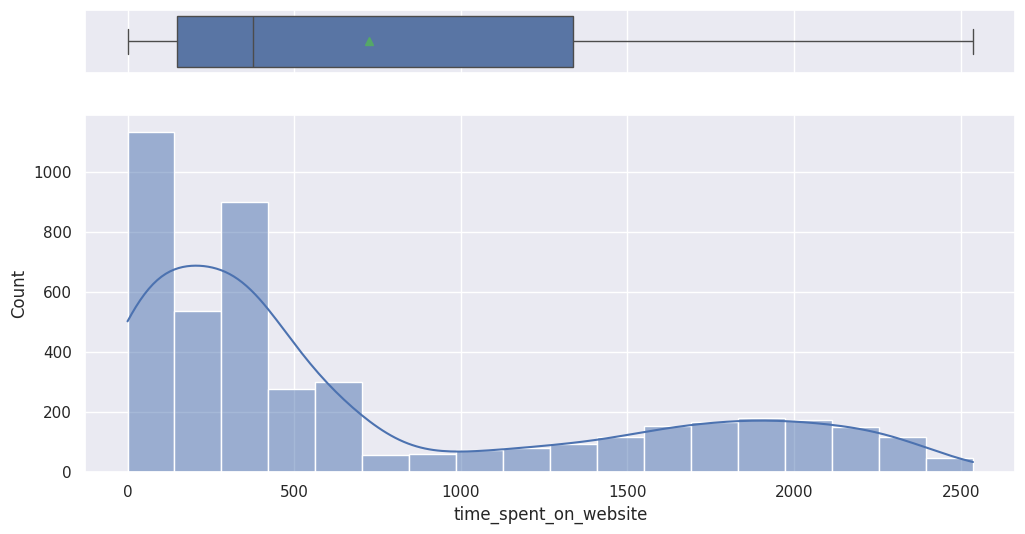

In [109]:
hist_box(data,'time_spent_on_website')

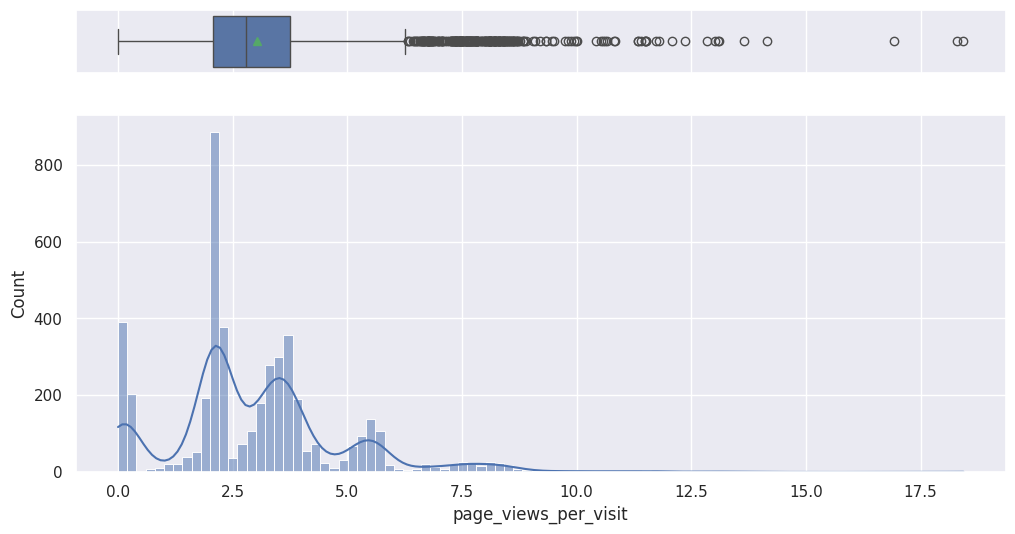

In [110]:
hist_box(data,'page_views_per_visit')

**OBSERVATIONS:**

1- The distribution of "age" appears to be left-skewed, with the highest population of leads falling within the 50-60 age range. No outliers have been detected for age.

2- The distribution of "Website_visit" is right-skewed, featuring some extreme values exceeding approximately 15. This will be addressed at a later stage.

3- The distribution of time spent on the website is also right-skewed, although no outliers have been identified.

4- The plot for "page_view_per_visit" displays a multi-modal and right-skewed distribution, with several outliers surpassing approximately 9. This issue will also be addressed in due course.

In [111]:
# exploring the extreme cases for "website_visits"
data[data['website_visits']>15]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
66,59,Unemployed,Mobile App,Medium,25,311,2.184,Phone Activity,No,No,Yes,No,No,0
452,24,Student,Mobile App,Low,24,137,6.814,Email Activity,No,No,No,No,No,0
509,24,Student,Mobile App,Medium,30,388,3.566,Website Activity,No,No,No,No,No,0
1045,60,Professional,Website,Medium,16,2072,9.058,Email Activity,Yes,No,Yes,Yes,No,1
1067,57,Professional,Website,High,18,371,3.783,Website Activity,Yes,No,No,No,No,0
1569,55,Professional,Mobile App,Medium,20,33,3.048,Phone Activity,Yes,No,No,No,No,0
1759,20,Student,Website,High,27,417,2.071,Email Activity,No,No,No,No,No,0
1933,56,Professional,Website,Medium,25,678,3.804,Email Activity,No,No,No,No,No,1
2192,40,Professional,Website,Low,21,216,2.252,Email Activity,No,No,No,No,No,0
2549,33,Professional,Mobile App,Medium,16,367,2.401,Email Activity,No,No,No,No,No,0


In [112]:
# exploring the extreme cases for "page_views_per_visit"
data[data['page_views_per_visit']>9]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
32,58,Professional,Mobile App,High,12,1151,18.434,Phone Activity,No,No,No,Yes,No,0
227,48,Unemployed,Website,Medium,2,1942,13.076,Phone Activity,No,No,No,Yes,No,0
268,57,Professional,Mobile App,Medium,3,1009,18.302,Phone Activity,No,No,No,No,No,0
472,24,Student,Mobile App,High,1,1661,9.100,Email Activity,Yes,No,Yes,Yes,No,0
1045,60,Professional,Website,Medium,16,2072,9.058,Email Activity,Yes,No,Yes,Yes,No,1
1119,25,Professional,Mobile App,Medium,1,1240,11.739,Website Activity,No,No,No,No,No,0
1430,19,Student,Mobile App,Medium,4,2292,10.584,Website Activity,No,No,No,No,No,0
1750,59,Professional,Website,High,3,369,10.670,Website Activity,No,No,No,No,No,0
1753,20,Student,Mobile App,High,5,721,10.808,Email Activity,No,No,No,No,No,1


Approximately 17 data points exhibit extremely high values for "website_visit" (greater than 15), while roughly 40 data points display extreme values for "page_views_per_visit" (greater than 9). We will proceed to remove these rows from the dataset.

In [113]:
# dropping the extreme values from "website_visits" and "page_views_per_visit"
data.drop(index=data[data.website_visits>15].index,inplace=True)
data.drop(index=data[data.page_views_per_visit>9].index,inplace=True)

We will plot the boxplot and histogram agian after removing extreme values.

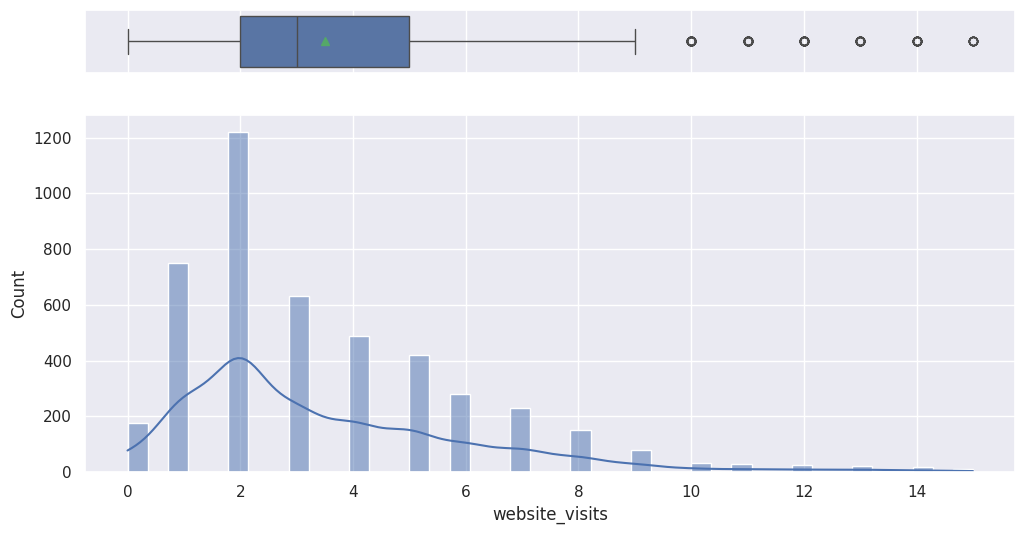

In [114]:
hist_box(data,'website_visits')

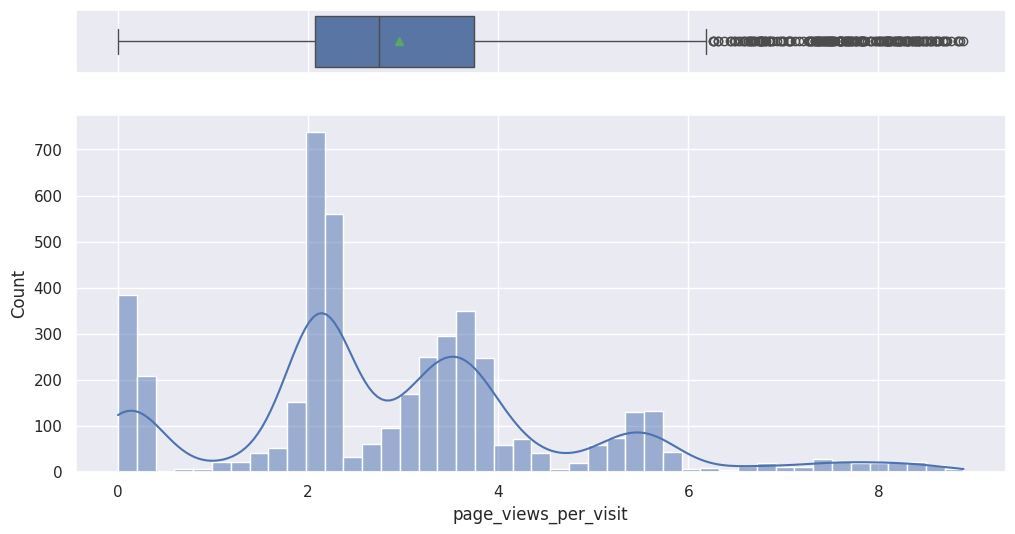

In [115]:
hist_box(data,'page_views_per_visit')


Upon reviewing the plots subsequent to removing outliers for "website_visit" and "page_views_per_visit," it is evident that while some outliers still persist, the most extreme values have been successfully eliminated. Adopting a conservative approach, we have decided not to remove any additional datapoints from the dataset.




Now we will proceed will some bivariate analysis.

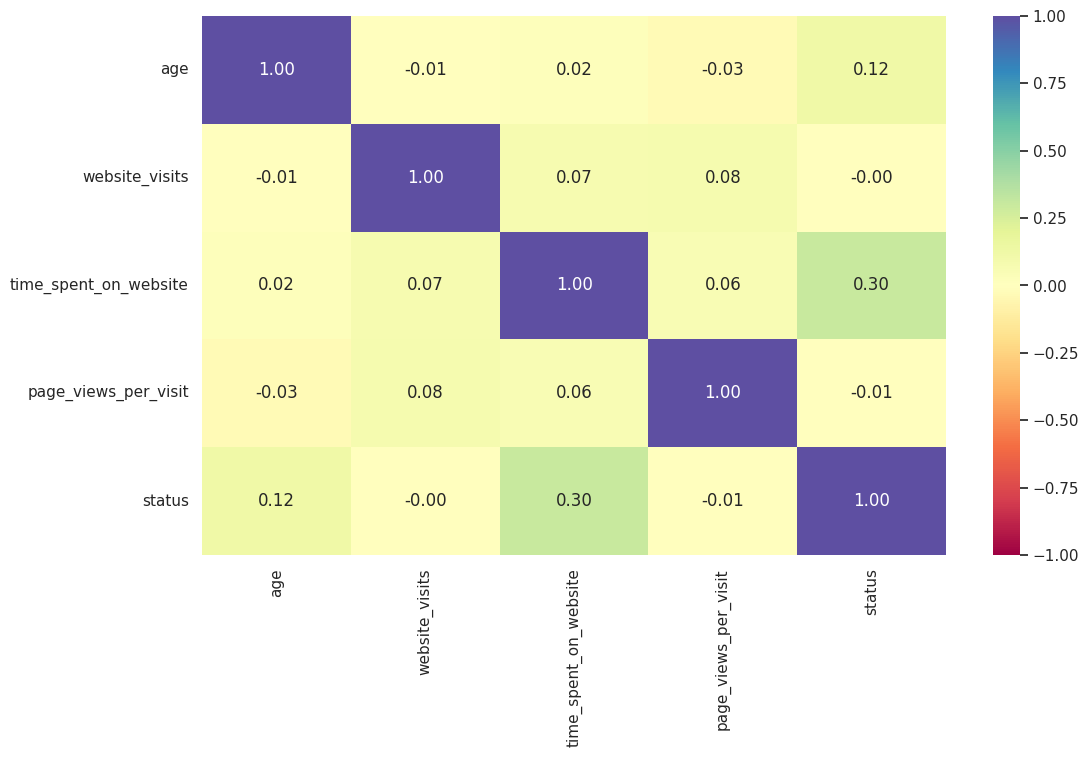

In [116]:
# Find and visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(data[numerical_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

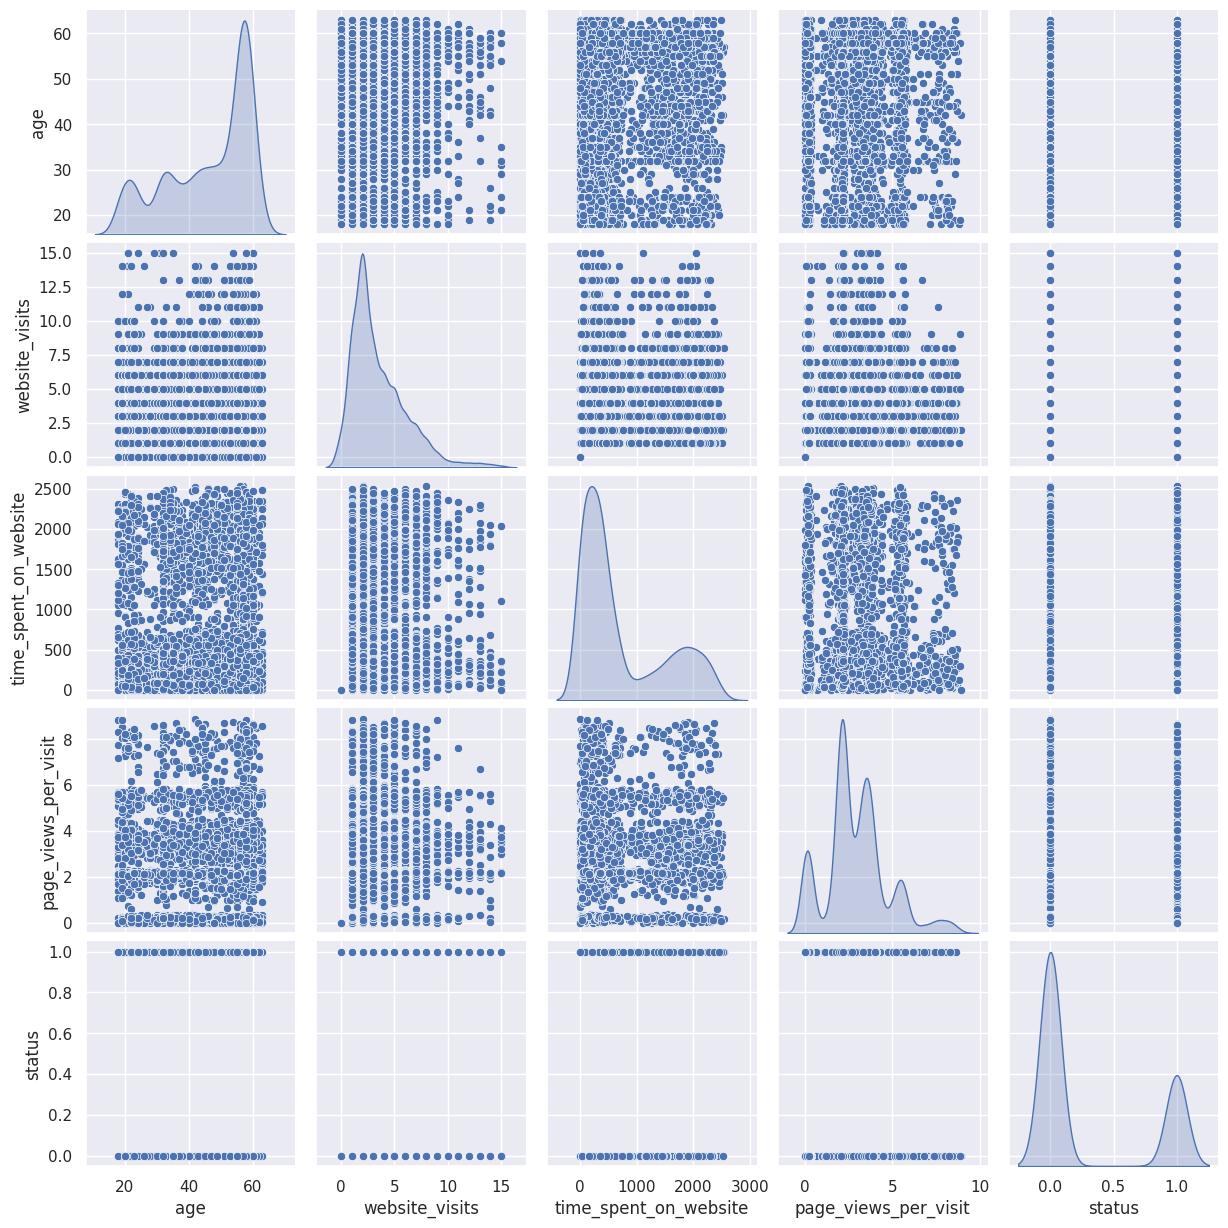

In [117]:
sns.pairplot(data,diag_kind='kde')
plt.show()

**Observations:**

1- A positive correlation exists between "status" and "time_spent_on_website". Additionally, there appears to be a weak correlation between "status" and "age".


2- Scatterplots depicting all pairs of numerical variables are also presented, revealing no strong or specific correlations or patterns.

Now, we are preparing the DataFrame for ML modeling. We have already removed extreme outliers and dropped the ID column. Since we will be using decision tree and random forest classifiers, scaling the features is not necessary. Let's proceed to create the feature and target variables.

In [118]:
# Separating dependent variable and features
X=data.drop(columns='status')
Y=data['status']

In [119]:
X.shape # checking the shape of X

(4556, 13)

In [120]:
Y.shape # Checking the shape of Y

(4556,)


Now, we generate dummy variables for categorical data

In [121]:
col_dummy=['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
X=pd.get_dummies(X, columns=col_dummy, drop_first=True)


In [122]:
X.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,0,1,1,0,0,0,1,1,0,1,0,0
1,56,2,83,0.320,0,0,0,0,1,0,1,0,0,0,1,0
2,52,3,330,0.074,0,0,1,0,1,0,1,0,0,1,0,0
3,53,4,464,2.057,0,1,1,0,0,0,1,0,0,0,0,0
5,50,4,212,5.682,0,1,0,0,0,1,0,0,0,0,1,0


Now, we partition the data into training and test sets.


In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

Let's define a function to generate the classification report.

In [124]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


Generally, classification models are evaluated using two types of metrics:

1- Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify all positive cases out of all actual positive cases. In the context of predicting paid customers, a high recall would mean capturing as many actual paid customers as possible, even if it results in some false positives (i.e., leads incorrectly classified as paid customers).

2- Precision measures the proportion of true positive predictions out of all positive predictions made by the model. In the context of predicting paid customers, a high precision would mean that the model correctly identifies paid customers with a high degree of confidence, minimizing the number of false positive predictions (i.e., leads incorrectly classified as paid customers).

Depending on the company's priorities and the associated costs and benefits, one metric may be more important than the other. As a startup company, it is important  to ensure that every potential paid customer is captured, even at the cost of some false alarms, then recall would be more important. This is particularly relevant if missing out on a potential paid customer carries significant opportunity costs. So, for the rest of analysis we will consider "recall" as a metric of model performance.



## Building a Decision Tree model

In [125]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)


Assessing the model's performance on the training dataset:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2238
           1       1.00      1.00      1.00       951

    accuracy                           1.00      3189
   macro avg       1.00      1.00      1.00      3189
weighted avg       1.00      1.00      1.00      3189



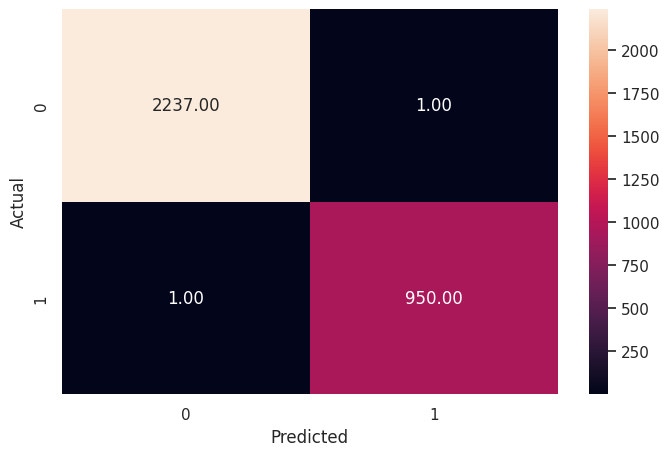

In [126]:
 # Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

**Observations:**


1-The model exhibits flawless performance on the training set, with no errors and each case correctly classified. This indicates outstanding performance on the training dataset.

2-Such performance is expected for decision trees, as they have the capacity to grow until they can classify each case accurately, particularly when there are no restrictions on their depth and other settings.

Now, let's evaluate the model's performance on the test set.

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       960
           1       0.68      0.67      0.67       407

    accuracy                           0.81      1367
   macro avg       0.77      0.77      0.77      1367
weighted avg       0.81      0.81      0.81      1367



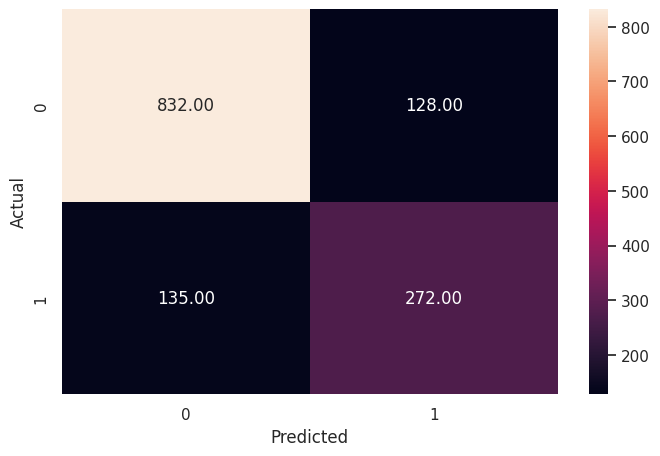

In [127]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

**Observations:**

1-The model demonstrates signs of overfitting, evidenced by its superior performance on the training data compared to the test data.

2- Hyperparameter tuning could potentially resolve the overfitting issue, and we can explore this avenue to improve the model's generalization performance.

## Do we need to prune the tree?

As discussed previously, the model appears to be overfitting the training data. Therefore, performing hyperparameter tuning can aid in pruning the tree and mitigating the overfitting issue.

In [128]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 10),
    'criterion': ['gini', 'entropy'],
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [5, 10, 20, 25],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, min_samples_split=5,
                       random_state=1)

The grid search method indicates that the best model performance is achieved with parameters: max_depth=4, max_leaf_nodes=50, min_samples_split=5. Now, let's evaluate the performance of the tuned model on the training and test datasets.

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2238
           1       0.70      0.83      0.76       951

    accuracy                           0.84      3189
   macro avg       0.81      0.84      0.82      3189
weighted avg       0.86      0.84      0.85      3189



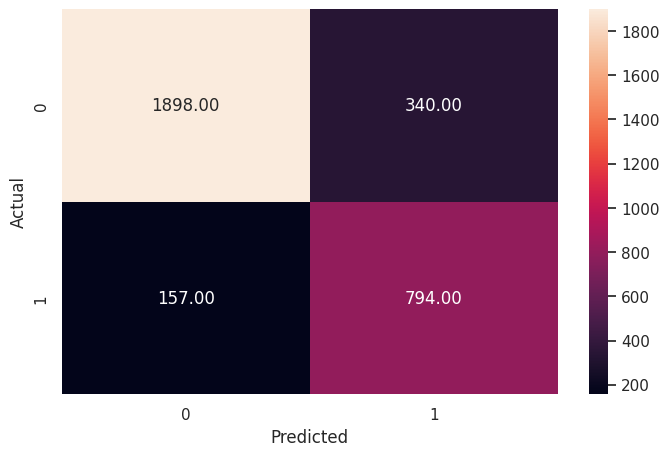

In [129]:
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       960
           1       0.70      0.80      0.75       407

    accuracy                           0.84      1367
   macro avg       0.80      0.83      0.81      1367
weighted avg       0.85      0.84      0.84      1367



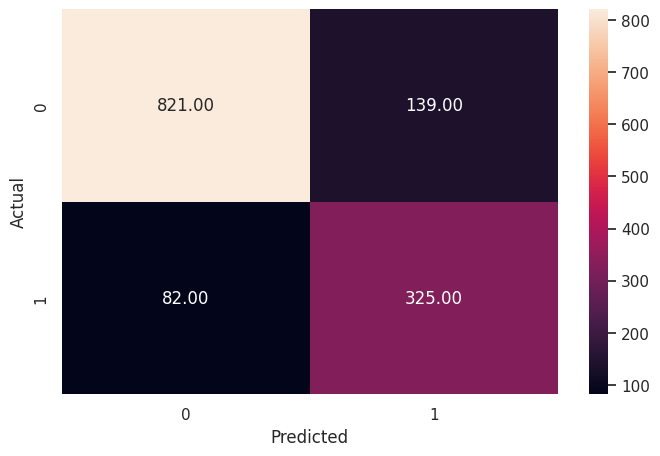

In [130]:
# Checking performance on the Test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

**Observations:**

1- The performance of the decision tree appears to be more generalizable compared to previous iterations, suggesting that hyperparameter tuning has effectively addressed the overfitting issue.

2- Following hyperparameter tuning, the recall value of test dataset has risen from 0.67 to 0.80, indicating an improvement in the model's ability to correctly identify positive cases.

3- The F1 value also improved after hyperparameter tunning, showing better balance between recall and precision.

Next, we will visualize the tree and examine the importance of different features.

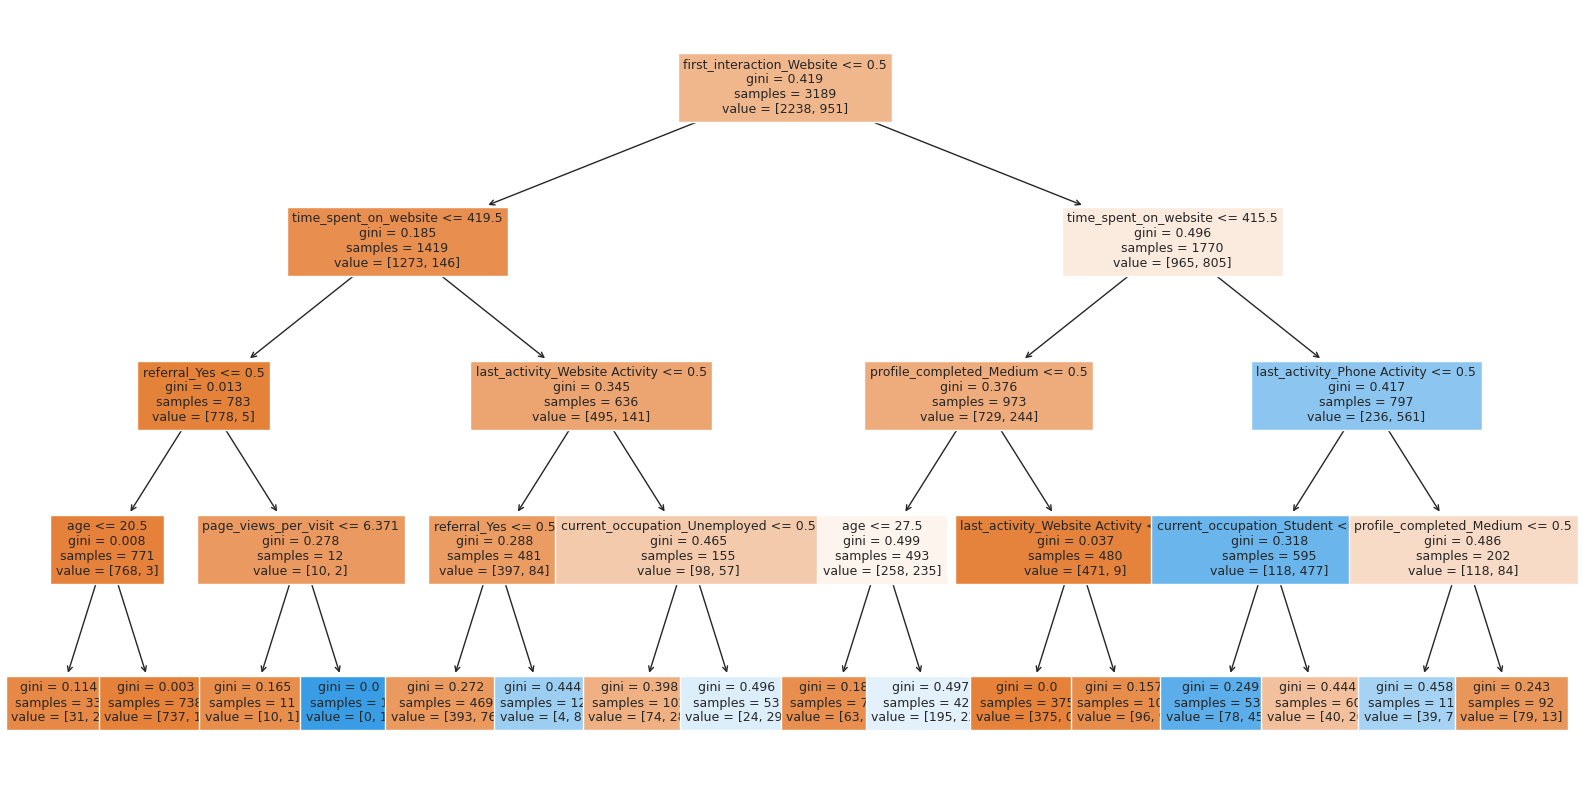

In [131]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)


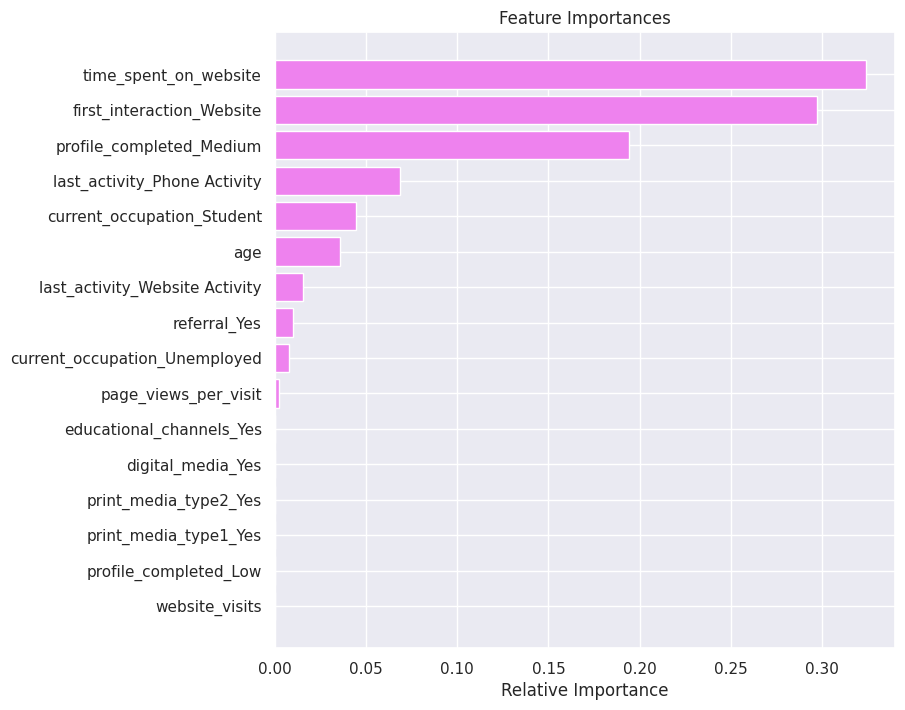

In [132]:
# Importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**:

1-According to the relative importance and visualized tree, "time_spent_on_website" and "first_interaction_website" emerge as the two most influential features in determining whether a lead converts to a paid customer or not, respectively. Additionally, "profile_completed," "age," and "current_occupation" are identified as other important features. Some of these findings were corroborated by the earlier univariate and bivariate analyses.

2- Other variables exhibit negligible impact on lead conversion.

Next, we will proceed by constructing a random forest model.

## Building a Random Forest model

In [133]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2238
           1       1.00      1.00      1.00       951

    accuracy                           1.00      3189
   macro avg       1.00      1.00      1.00      3189
weighted avg       1.00      1.00      1.00      3189



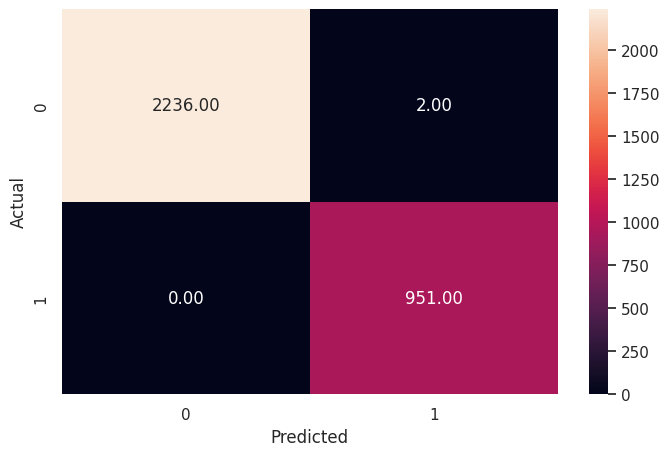

In [134]:
# Applying the random forest to the training set.
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       960
           1       0.80      0.67      0.73       407

    accuracy                           0.85      1367
   macro avg       0.84      0.80      0.82      1367
weighted avg       0.85      0.85      0.85      1367



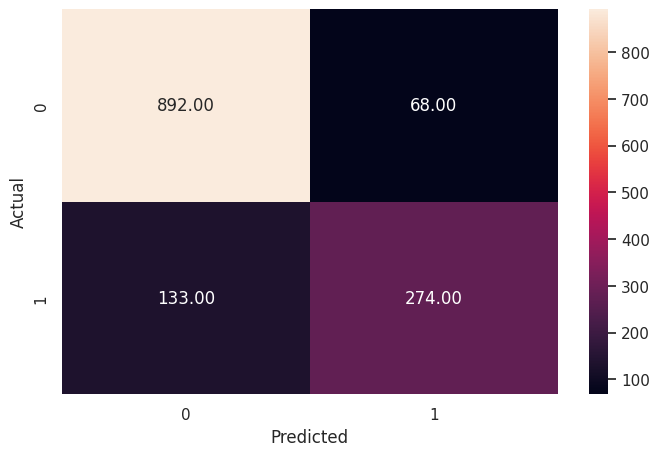

In [135]:
#Applying the random forest model to the test set.
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

1- Similar to Desicion tree model, random forest also shows overfitting, as its performance on the train data is better than test data.

2- The recall score on test data is 0.67, which is less than that of  tuned desicion tree (after hyperparametr tunning), but similar to that of desicion tree before hyperparameter tunning.

3- Hyperparamter tunning in random forest might also improve the prediction.



## Do we need to prune the tree?

As discussed above, the random forest model shows some degree of overfitting, so pruning based on hyperparameter search can be helpful to improve the generalizablity of the model.

In [136]:
# Choose the type of classifier
estimator= RandomForestClassifier(criterion = "entropy", random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120,130],
    "max_depth": [6, 7,8],
    "min_samples_leaf": [20, 25],
    "max_features": [0.7,0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features=0.7, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=110, random_state=1)

After finding the set of  hyperparameters that leads to the best performance, we apply the tuned model to the test and train datasets and evalutes their performance.

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2238
           1       0.73      0.85      0.78       951

    accuracy                           0.86      3189
   macro avg       0.83      0.86      0.84      3189
weighted avg       0.87      0.86      0.86      3189



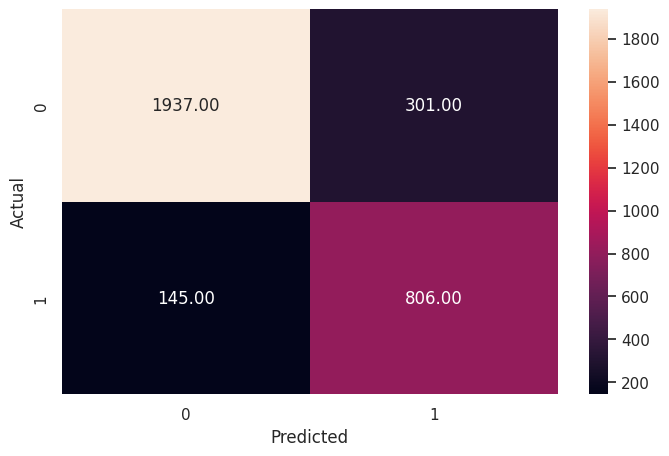

In [137]:
# Performance of the model on the training data
rf_tuned = estimator.predict(X_train)
metrics_score(y_train,rf_tuned)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       960
           1       0.72      0.82      0.77       407

    accuracy                           0.85      1367
   macro avg       0.82      0.84      0.83      1367
weighted avg       0.86      0.85      0.85      1367



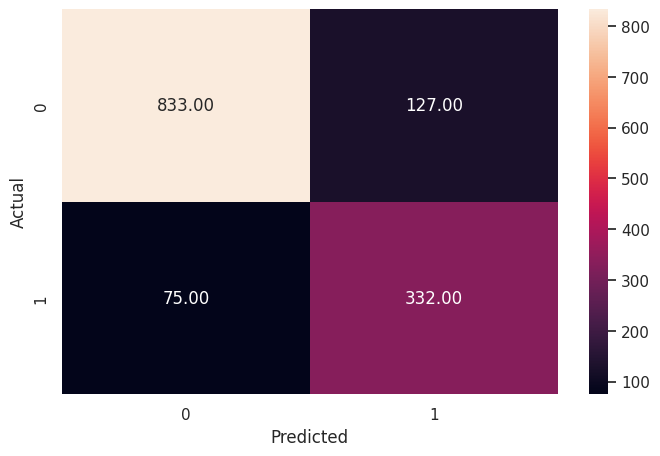

In [138]:
# Checking performance on the Test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

**Observations:**


1- The performance of the random forest model after hyperparameter tuning shows a closer alignment between the test and train datasets, with a recall value of 0.85 on the training data and 0.82 on the test data. This indicates that hyperparameter tuning has enhanced the model's generalizability.

2- In comparison to the tuned decision tree model, which achieved a recall value of 0.80, the random forest model exhibits a slightly higher recall of 0.82. This suggests that the random forest model may be preferred as the final choice for prediction

Although we cannot visualize the random forest model as oppose to desicion tree, still we can look at feature importance predicted by random forest model.

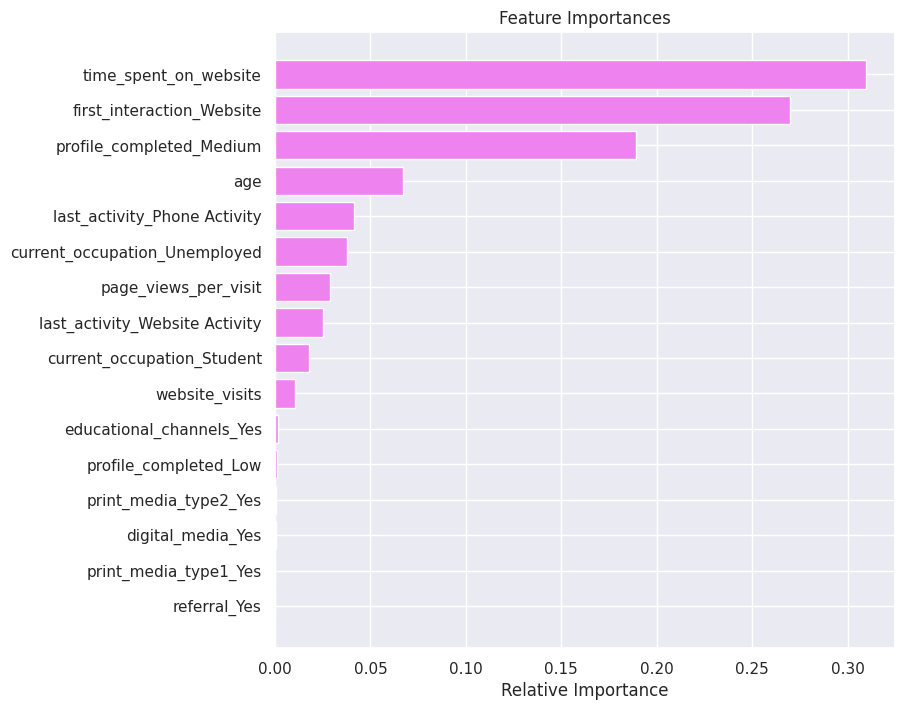

In [139]:
# Importance of features in the tree building
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**


1- According to the feature importance analysis of the random forest, the top three important features are "time_spent_on_website," "first_interaction_website," and "profile_completed_medium." This reaffirms the findings from the decision tree analysis.

2- Additionally, "age," "current occupation," and the "type of last activity" are identified as other factors that may influence whether a lead converts to a paid customer.

## Actionable Insights and Recommendations

Here are some insights and recommendations based on our analysis:

1- Based on the findings, it's clear that "time_spent_on_website," "first_interaction_website," and "profile_completed_medium" are the three most influential factors in converting a lead to a paid customer. Therefore, the company should focus on optimizing these factors to enhance sales performance.

2- Optimize Website Experience: Since "time_spent_on_website" and "first_interaction_website" are crucial factors, focus on enhancing the website experience to engage leads and encourage them to spend more time browsing. This could involve improving website navigation, loading speed, and user interface to make it more intuitive and appealing.

3- Encourage Profile Completion: Given the significance of "profile_completed_medium," incentivize or encourage leads to complete their profiles on the company's platform. Provide clear benefits or rewards for completing profiles, such as access to exclusive content, discounts, or personalized recommendations. Ensure that the profile completion process is user-friendly and streamlined to minimize friction.

4-  occupation have also emerged as significant factors influencing lead conversion rates. Professionals exhibit the highest conversion rate, while students demonstrate the lowest. To capitalize on these insights, the company should consider tailoring marketing campaigns and messaging to resonate with different occupational segments.

For professionals, emphasize the practical benefits and value propositions of the product or service. Highlight how the offering addresses their professional needs, enhances productivity, or facilitates career advancement. Additionally, showcase testimonials or case studies from professionals within their industry to establish credibility and relevance.



5-  Develop targeted marketing campaigns tailored to the age groups with higher conversion rates (i.e., 34 to 54). Craft messaging and promotions that resonate with the interests, preferences, and life stages of these age groups. Highlight product features, benefits, and value propositions that align with their needs and aspirations.

6- Based on the analysis, although there are relatively few referrals in the dataset, the stacked barplot illustrates that approximately 70% of leads with referrals successfully converted to paid customers. This suggests an opportunity for the company to incentivize and encourage referrals as a strategic growth initiative.
To capitalize on the potential of referrals in driving conversions, the company should consider implementing a referral incentive program. By offering rewards, discounts, or other incentives to customers who refer new leads, the company can stimulate word-of-mouth marketing and cultivate a loyal customer base